In [112]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Definições do modelo

In [157]:
sigma=[] # condutividades
h=[] # espessuras em metros e a última camada é semi-infinita
frequencias = np.logspace(-3, 3, 40)  # 10 frequências entre 0.001 Hz e 1000 Hz
mu0 = 4 * np.pi * 1e-7

### Definição do número de camadas e preenchimento das listas com valores aleatórios

In [158]:
camadas=2
for i in range(camadas):
     #limitar condutividades entre 0.0001 e 1)- 3 casas decimais
    sigma.append(round(random.uniform(0.0001, 1),3))
    #Preencher as espessuras em metros           
    if i==0:
        continue
    else:
        h.append(round(random.uniform(10,300)))

sigma=np.array(sigma)
h=np.array(h)
print('Condutividades:',sigma)
print('espessuras:',h)

Condutividades: [0.616 0.159]
espessuras: [181]


## Cálculo dos parâmetros físicos 

Frequencia angular:
$$\omega = 2\pi f$$
Constante de propagação:
$$\gamma_j(f)=\sqrt{i\omega\mu_0\sigma_j}$$ 
Impedância intríseca:
$$\eta_j(f)=\sqrt{\dfrac{i\omega\mu_0}{\sigma_j}}$$  

In [159]:
omega=[]
for i in frequencias:
    omega.append(2*np.pi*i)

omega=np.array(omega) 
print(omega)

[6.28318531e-03 8.95418416e-03 1.27606318e-02 1.81852104e-02
 2.59157919e-02 3.69326642e-02 5.26328384e-02 7.50071986e-02
 1.06892959e-01 1.52333441e-01 2.17090794e-01 3.09376670e-01
 4.40893519e-01 6.28318531e-01 8.95418416e-01 1.27606318e+00
 1.81852104e+00 2.59157919e+00 3.69326642e+00 5.26328384e+00
 7.50071986e+00 1.06892959e+01 1.52333441e+01 2.17090794e+01
 3.09376670e+01 4.40893519e+01 6.28318531e+01 8.95418416e+01
 1.27606318e+02 1.81852104e+02 2.59157919e+02 3.69326642e+02
 5.26328384e+02 7.50071986e+02 1.06892959e+03 1.52333441e+03
 2.17090794e+03 3.09376670e+03 4.40893519e+03 6.28318531e+03]


As constantes de propagação e a impedância intríseca serão matrizes $$F\times N$$ combinações do número de Frequências (F) e Camadas (N). O$$\gamma_j(f_i)$$ é dado por:

$$
\gamma = 
\begin{bmatrix}
\gamma_{11} & \gamma_{12} & \cdots & \gamma_{1N} \\
\gamma_{21} & \gamma_{22} & \cdots & \gamma_{2N} \\
\vdots      & \vdots      & \ddots & \vdots      \\
\gamma_{F1} & \gamma_{F2} & \cdots & \gamma_{FN} \\
\end{bmatrix}
\quad
\text{com} \quad
\gamma_{ij} = \sqrt{ i \omega_i \mu_0 \sigma_j }
$$

da mesma forma $$\eta(f_i)$$ com shape (F,N)

In [160]:
#broadcasting
omega = omega[:, np.newaxis]  # agora shape (3, 1)
sigma = sigma[np.newaxis, :]  # agora shape (1, 3)

# Constante de propagação γ_j (para todos f e j)
gamma = np.sqrt(1j * omega * mu0 * sigma)

# Impedância intrínseca η_j
eta = np.sqrt(1j * omega * mu0 / sigma)

In [161]:
print(np.matrix(gamma))

[[4.93139993e-05+4.93139993e-05j 2.50540783e-05+2.50540783e-05j]
 [5.88699004e-05+5.88699004e-05j 2.99089735e-05+2.99089735e-05j]
 [7.02775120e-05+7.02775120e-05j 3.57046339e-05+3.57046339e-05j]
 [8.38956523e-05+8.38956523e-05j 4.26233580e-05+4.26233580e-05j]
 [1.00152670e-04+1.00152670e-04j 5.08827691e-05+5.08827691e-05j]
 [1.19559918e-04+1.19559918e-04j 6.07426612e-05+6.07426612e-05j]
 [1.42727838e-04+1.42727838e-04j 7.25131701e-05+7.25131701e-05j]
 [1.70385159e-04+1.70385159e-04j 8.65645287e-05+8.65645287e-05j]
 [2.03401822e-04+2.03401822e-04j 1.03338712e-04+1.03338712e-04j]
 [2.42816345e-04+2.42816345e-04j 1.23363341e-04+1.23363341e-04j]
 [2.89868480e-04+2.89868480e-04j 1.47268275e-04+1.47268275e-04j]
 [3.46038221e-04+3.46038221e-04j 1.75805427e-04+1.75805427e-04j]
 [4.13092345e-04+4.13092345e-04j 2.09872412e-04+2.09872412e-04j]
 [4.93139993e-04+4.93139993e-04j 2.50540783e-04+2.50540783e-04j]
 [5.88699004e-04+5.88699004e-04j 2.99089735e-04+2.99089735e-04j]
 [7.02775120e-04+7.027751

$$
\textbf{Recorrência descendente — Modo TE}$$

$$
\text{Para cada frequência } f_i, \text{ usamos:}
$$

$$\omega_i = 2\pi f_i $$

$$\gamma_j = \sqrt{i \omega_i \mu_0 \sigma_j}$$

$$\eta_j = \sqrt{\frac{i \omega_i \mu_0}{\sigma_j}}$$

$$
\text{Inicialização na camada inferior (semi-infinita):} \quad
\eta^{(N)} = \eta_N
$$

$$
\text{Para cada camada } j = N-1 \text{ até } 1:
$$

$$
\eta^{(j)} = \eta_j \cdot
\frac{
\eta^{(j+1)} + \eta_j \tanh(\gamma_j h_j)
}{
\eta_j + \eta^{(j+1)} \tanh(\gamma_j h_j)
}
$$

$$
\text{No final, temos:} \quad
\boxed{
\eta^{(1)} = \text{impedância de entrada na superfície para } f_i
}
$$


z entrada é um vetor de tamanho F, onde cada z[i] é $$\eta^{(1)}(f_i)$$.

In [162]:
z = np.zeros(len(frequencias), dtype=complex)
for i in range(len(frequencias)):
    #selecionando a linha i da matriz da constante de propagação e impedância
    eta_i=eta[i,:]
    gamma_i = gamma[i, :]
    
    eta_total = eta_i[-1]  # eta_total= eta da última camada

    for j in reversed(range(camadas-1)): 
        # Loop ao contrário. 
        # A quantidade de operações é do número de camadas-1 
        # Ex: para 3 camadas: z3=z3, se faz recussão entre 3 e 2, 2 e 1.
        eta_total=eta_i[j]*(
                (eta_total+eta_i[j]* np.tanh(gamma_i[j] * h[j]))/
                (eta_i[j]+eta_total* np.tanh(gamma_i[j] * h[j]))
    )
        
    z[i] = eta_total

In [163]:
print(z)

[0.0001575 +0.00015354j 0.00018799+0.00018238j 0.00022436+0.00021642j
 0.00026773+0.00025654j 0.00031945+0.00030368j 0.00038108+0.00035891j
 0.00045446+0.00042339j 0.00054177+0.00049836j 0.00064549+0.00058507j
 0.00076851+0.00068481j 0.00091407+0.00079874j 0.00108576+0.00092787j
 0.00128747+0.00107297j 0.00152319+0.00123444j 0.00179687+0.00141231j
 0.00211205+0.0016063j  0.00247153+0.00181608j 0.00287687+0.00204181j
 0.00332816+0.00228506j 0.00382381+0.00255019j 0.00436099+0.00284621j
 0.00493653+0.00318901j 0.00554891+0.00360386j 0.00620129+0.00412802j
 0.00690612+0.00481283j 0.00769176+0.00572468j 0.00861144+0.00694287j
 0.00975339+0.00855072j 0.01124628+0.01061554j 0.01324501+0.01315872j
 0.0158804 +0.0161393j  0.01919155+0.0195003j  0.02313025+0.02328543j
 0.02769316+0.02770187j 0.03303827+0.03301416j 0.03941741+0.03941276j
 0.04705542+0.04705691j 0.05617516+0.05617517j 0.06706045+0.06706043j
 0.08005519+0.08005519j]


## Fazendo as curvas de fase e resistividade aparente

In [164]:
rho_a=[]
rho_a =( np.abs(z)**2 / (mu0 * omega.flatten()))
fase = np.angle(z, deg=True) #Ccalcula o argumento de um número complexo

In [165]:
rho_a

array([6.12751185, 6.09666135, 6.06004775, 6.01664663, 5.96527474,
       5.90457617, 5.83301291, 5.74886335, 5.65023392, 5.53509074,
       5.40132043, 5.24683091, 5.0697039 , 4.86840902, 4.64208333,
       4.39086739, 4.11626888, 3.82149836, 3.51169777, 3.19397202,
       2.87715449, 2.57129363, 2.28692974, 2.03429773, 1.82259499,
       1.65935002, 1.54971157, 1.49521155, 1.49149613, 1.52537706,
       1.57419515, 1.61293262, 1.62868733, 1.62779211, 1.62400998,
       1.62311696, 1.62334835, 1.6233843 , 1.62337613, 1.62337664])

### Pelo período

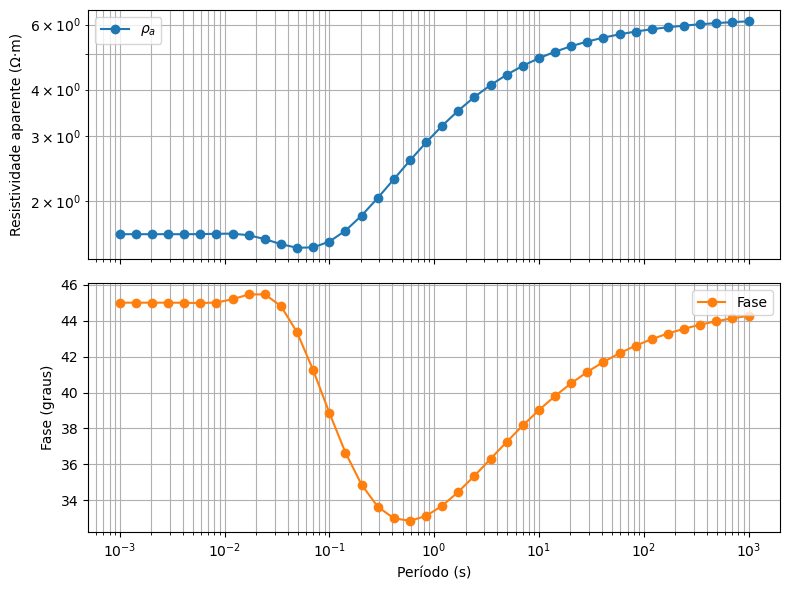

In [166]:
# Convertendo para período (em segundos)
periodos = 1 / frequencias

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Resistividade aparente
ax[0].loglog(periodos, rho_a, marker='o', label='$ρ_a$')
ax[0].set_ylabel('Resistividade aparente (Ω·m)')
ax[0].grid(True, which='both')
ax[0].legend()

# Fase
ax[1].semilogx(periodos, fase, marker='o', color='tab:orange', label='Fase')
ax[1].set_xlabel('Período (s)')
ax[1].set_ylabel('Fase (graus)')
ax[1].grid(True, which='both')
ax[1].legend()

plt.tight_layout()
plt.show()


### Pela frequência

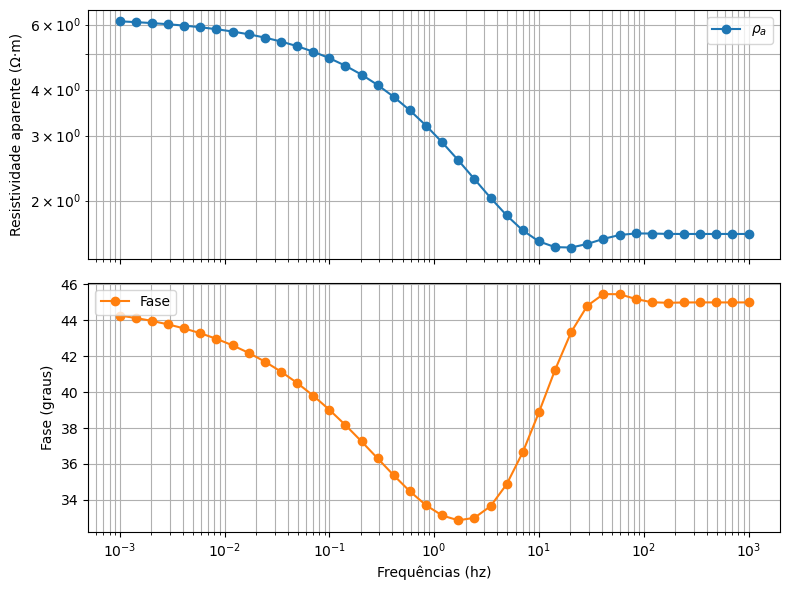

In [167]:
# Convertendo para período (em segundos)
# periodos = 1 / frequencias

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Resistividade aparente
ax[0].loglog(frequencias, rho_a, marker='o', label='$ρ_a$')
ax[0].set_ylabel('Resistividade aparente (Ω·m)')
ax[0].grid(True, which='both')
ax[0].legend()

# Fase
ax[1].semilogx(frequencias, fase, marker='o', color='tab:orange', label='Fase')
ax[1].set_xlabel('Frequências (hz)')
ax[1].set_ylabel('Fase (graus)')
ax[1].grid(True, which='both')
ax[1].legend()

plt.tight_layout()
plt.show()
